
# <font color='red'><center> Deep Learning: Multi-Layer Perceptron(MLP) and Convolution Neural Network(CNN) </center> </font>

## From Biological to artificial neurons

<center><img src="../assets/bio_neurons.png" width="600"></center>

- cell body : containing most of the cell's complex components
- dentrites:  Branching extensions.
- axon : very long extension
- synapsis: minsucule branches at the extremity of the axon which are connected directly to the dentrite or body of the othe neurons.

**When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it outputs its own signals**

- Each neuron is typically connected to thousands of other neurons.
- Some study show that biological neurons are often organized in a consecutive layers.
 <center><img src="../assets/multi_layer.png" width="600"></center>

 <center><img src="../assets/logic_cmput.png" width="600"></center>
 
- Simple model of the biological neurons proposed by `Warren McCulloch and Walter Pitts`.
- This model can be used to calculate any logical proposition.

## Perceptron

- One of the simplest Artificial Neural Network(ANN) architectures invented by Frank Rosenblatt in 1957.
- It is based on a threshold logic unit (TLU).
 <center><img src="../assets/mlp.png" width="600"></center>
 
 - z = $w_1 x_1 + w_2x_2 + ...+w_nx_n = X^T W $
 
 - The most common step functions are:
 \begin{equation*}
   \text{heaviside(z)} = \begin{cases}
               0               & z < 0\\
               1               & n \geq 1\\
           \end{cases}
\end{equation*}

 \begin{equation*}
   \text{sign(z)} = \begin{cases}
               -1              & z<0 \\
               0               & z = 0\\
               +1               & n > 1\\
           \end{cases}
\end{equation*}
- A single TLU can be used for simple linear binary classification.
- A perceptron is simply composed of a single layer of TLU where each TLU is connected to all the inputs.
- When all the neurons in a given layer are connected to every neuron in the previous layer, it is called `fully connected layer.` or `dense layer`.
- It is common to draw special passthrough neurons called `input neurons`. All the input neurons form the `input layer`.

 <center><img src="../assets/perceptron_diagram.png" width="600"></center>
 
 - The output of a fully connected layer is given by :
 $$ h_{w, b} = \phi(XW + b)$$
 
 - Matrix $X $ : Input features. It has row by instance
 - Matrix $W $ : contains all the connection weights except for the ones from the bias neuron.
 - Vector $b $ : bias vector contains all the connection weights between bias neuron and the artificial neurons.
 - Each artificial neuron has one bias term.
 - $\phi$ is the activation function

 ### Learning rule
 <center><img src="../assets/learning_rule.png" width="600"></center>
 
- The decision boundary of each output neuron is linear, so percetprons are incapable of learning complex patterns.
- Scikit-learn provide an implementation of perceptron (`from sklearn.linear_model import Perceptron`)

## Multi-layer perceptron(MLP)

An MLP is composed of one `input layer`, one or more layers of TLUs called `hidden layers` and one final layer of TLU called `output layer.`
 <center><img src="../assets/MLP.png" width="600"></center>
 
- The layers close to the input layers are usually called lower layers.
- The ones close to the output layers are usually called upper layers.
- The signal flows only in one direction, from input to the output, so the architecture is an example of a `feedforward neural network` (FNN).
- When the architecture contains a deep stack of hidden layers, it is called a `deep neural network(DNN)`.


### Training MLPs:

- Researchers struggled many years to find a way to train MLPs without success. In 1986, `David Rumelhart, Geoffrey Hinton and Ronald Williams` published a groundbreaking paper `introducing the backpropagation training algorithm`, which is still used today.

- It is simply Gradient Descent using an efficient technique for computing gradient automatically: in just two passes through the network: forward pass and backward pass.

- **Backpropagation algorithm**:

    - It handle one mini-batch at a time (e.g. 32 samples), and it loops on the full dataset multiple times. Each pass is called an `epoch`.
    - Forward pass: Each mini-batch is passed from the network's input layer directly to the hidden layer. The algorithm calculate the output of each hidden layer and pass the result to the next layer and So on until we reach the output layer. All intermediate results are saved to be used in the backward pass.
    - The algorith measure the error using a loss function.
    - Calculate the contribution of each output connection to the error using `the chain rule` (most fundamental rule in calculus).
    - Backward pass: Calculate how much each of these error contributions came from each connection in the layer below and so on, until it reaches the input layer. This reverse pass measures the error gradient across all the connection weights in the network by propgating the error gradient backward through the network. 
    - Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network using the error gradients it just computed.


The authors also make a key change to the MLP's architecture: they replaced the `step function` which is not differentiable by other functions such as:
- Hyerbolic tangent function: $tanh(z) = 2 \sigma(2z) - 1$
- Rectified Linear Unit function: $ReLU(z) = max(0, z)$

For more details about backpropagation see: https://hmkcode.com/ai/backpropagation-step-by-step/
    

### Typical classification MLP architecture:

 <center><img src="../assets/classif.png" width="800"></center>


### Building image classifier using MLP om Keras

In this section, we will build an image classifier using `FASHION MNIST`. Here we will use the Sequential API because the architecture a sequence of layers. We don't need the Functional API.

In [21]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model

In [22]:
# Load the data set from keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("Train data shape :", X_train_full.shape)
print("Test data shape :", X_test.shape)
print("Dtype of images:",X_train_full.dtype )

# split the X_train_full into train and valid and normalize the data simply in [0,1]
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# class name of first sample in the training set
class_names[y_train[0]]

Train data shape : (60000, 28, 28)
Test data shape : (10000, 28, 28)
Dtype of images: uint8


'Coat'

In [23]:
# build the model
model = Sequential()
# flatten the input images inot (-1, 28*28 pixels)
model.add(Flatten(input_shape=[28, 28]))
# first hidden layer
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# we can call the model using a list of layers as well:
# model = keras.models.Sequential([
# keras.layers.Flatten(input_shape=[28, 28]),
# keras.layers.Dense(300, activation="relu"),
# keras.layers.Dense(100, activation="relu"),
# keras.layers.Dense(10, activation="softmax")
# ])

In [24]:
# show the summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Explore the model's structure

In [25]:
# show the layers 
print("Layers :", model.layers)
# get the name of layers
layers_names = [layer.name for layer in model.layers]
print("Layers names : ", layers_names)

Layers : [<tensorflow.python.keras.layers.core.Flatten object at 0x7fabc4784d60>, <tensorflow.python.keras.layers.core.Dense object at 0x7fabc4784760>, <tensorflow.python.keras.layers.core.Dense object at 0x7fabc4793f70>, <tensorflow.python.keras.layers.core.Dense object at 0x7fabc479e9d0>]
Layers names :  ['flatten_2', 'dense_5', 'dense_6', 'dense_7']


In [26]:
# Get the parameter of a layer
weights, biases = model.layers[1].get_weights()

print("weights.shape :", weights.shape)
print("biases.shape :", biases.shape)
print("Biases is intialized to zero by default : ", biases)

weights.shape : (784, 300)
biases.shape : (300,)
Biases is intialized to zero by default :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

**Note:**

We can change the weights (kernel) initialization using `kernel_initializer` and bias using `bias_initializer` parameters of `Dense` layer.

#### Compiling the model

After creating the model, we need to call `compile()` function to specify `loss function`, `optimizer`, and `metrics`.

In [27]:
model.compile(loss="sparse_categorical_crossentropy", # we don't need to convert labels to one hot encoding. 
              optimizer="sgd", # stochastic gradient descent optimizer.
              metrics=["accuracy"] # accuracy metric  for classification.
             )

#### Train the model

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7127 - accuracy: 0.7668 - val_loss: 0.4963 - val_accuracy: 0.8366
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4865 - accuracy: 0.8300 - val_loss: 0.4548 - val_accuracy: 0.8460
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4433 - accuracy: 0.8458 - val_loss: 0.4136 - val_accuracy: 0.8612
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8557 - val_loss: 0.4268 - val_accuracy: 0.8498
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3943 - accuracy: 0.8611 - val_loss: 0.3918 - val_accuracy: 0.8614
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3774 - accuracy: 0.8681 - val_loss: 0.3772 - val_accuracy: 0.8692
Epoch 7/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3636 - accuracy: 0.8716 - val_loss: 0.3852 - val_accuracy:

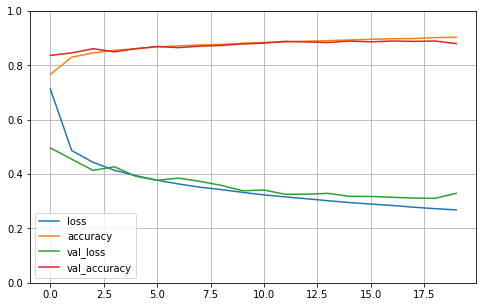

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Evaluate using model

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 87.9121 - accuracy: 0.8053


[87.91213989257812, 0.8052999973297119]

### Make a prediction using the model

In [31]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Saving the model and load model

In [32]:
# save model
model.save('model.h5')
# load model
del model
model = load_model('model.h5')

**Note**:
 - The `Sequential API` is used only to create a squential model.
 - The `Functional API` model can be used to create more complicated/dynamic model.

### Using Callbacks:
`fit()` function accept a callbacks argument that lets you specify a list of objects that keras call during training at the start and end of training, at the start and end
of each epoch and even before and after processing each batch.

In [33]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath='keras_model.h5', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

callback_lists = [checkpoint_cb, early_stopping_cb]

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=callback_lists)

# try adding the early stopping callback


Epoch 1/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2629 - accuracy: 0.1036 - val_loss: 0.3107 - val_accuracy: 0.1006
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.1029 - val_loss: 0.3015 - val_accuracy: 0.1028
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2532 - accuracy: 0.1027 - val_loss: 0.3022 - val_accuracy: 0.0996
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2487 - accuracy: 0.1033 - val_loss: 0.2891 - val_accuracy: 0.0948
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2445 - accuracy: 0.1038 - val_loss: 0.3233 - val_accuracy: 0.0774
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2410 - accuracy: 0.1031 - val_loss: 0.2981 - val_accuracy: 0.1010


### Visualization using Tensorboard

- TensorBoard is a great interactive visualization tool that you can use:
    - View the learning curves during training.
    - Compare learning curves between multiple runs.
    - visulize the computation graph.
    - etc

In [34]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [35]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir=get_run_logdir(), histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', profile_batch=0, embeddings_freq=0,
    embeddings_metadata=None)

In [ ]:
callback_lists = [checkpoint_cb, early_stopping_cb, tensorboard_cb]

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=callback_lists)


### Hyperparameters
- `Learning Rate:`The most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate. A simple approach is to start with large value, then divide it by 3 until the algorithm stop diverging.
- `Optimizer:` there is better optimizer better than SGD such as Adam, RmsProp, etc.
- `Batch_size:` The batch size can also have better significant impact on the model's performance and the training time. A typical values is 32, 64.
- `Activation fucntion:` Relu, sigmoid, leaky Relu

## Training deep neural networks(DNN):

- The network above contains just few hidden layers, it is a very `shallow` model.
- If we tackle a more complex problem like detecting 100 of type of objects, we need more deeper network that perhaps contains more than 10 layers  or much more, each containing hundreds of neurons, connected by hundreds of thousands of connections. In this case we can face several problems:

    - Vanishing gradient problem or exploding gradient problem, which makes difficult to train lower layers.
    - We need more much data.
    - Training can be extremely slow.
    - Model with millions of parameters would severely risk overfitting the training set. 

### Vanishing problem:
- Backpropagation algorithm propagates the error gradient from the output layer to the input.
- It computes the gradient of the cost function with regards to each parameter to update them with a gradient descent step.
- The problem is that gradients often get smaller and smaller as the algorithm progresses down to the lower. So the the gradient leaves the lower layers parameters unchanged and training never converged to a good solution. `This is called vanishing problem.`
- The opposite can happen and the gradient can grow bigger and bigger and a lot of parameters will get large weight and the algorithm diverge. `This is called exploding problem.` which mostly encountered in Recurrent Neural Network(RNN).
- Researchers (Bengio et al.) showed that the problem is coming mostly from the weights initialization (normal distribution) and the activation function (sigmoid). In fact, the variance of the output of each layer is keep increasing by going forward in the network until the activation saturates.
<center><img src="../assets/activation_fct.png" width="600"></center>
- Numerous initialization methods have been proposed to alleviate this problem such as Glorot(default initialization in tensorflow), He initialization.
- Numerous non-saturated activation function methods have been proposed as well `Relu, leaky Relu and ELU`. 
- All these solutions can resolve the vanishing/exploding at the begining of training but it does not guarentee that they won't come back during training.
- Sergey et al. proposed the `Batch Normalization` technique to adress the vanishing/exploding and it works well. It is simply adding an operation before or after the activation function to standardize the input of the layer and reduce the  internal covariate shift
- Gradient clipping: It is another technique to deal with exploding problem is to simply clip the gradients during backpropagation so they never exceed some threshold.

### Avoiding Overfitting through regularization:

#### L1 and L2:

As we did for simple linear models, we can apply l1 and l2 regularization.

`layer = tensorflow.keras.layers.Dense(100, activation="elu",
kernel_initializer="he_normal",
kernel_regularizer=tensorflow.keras.regularizers.l2(0.01))`

#### Dropout:

- One of the most popular regularization techniques for deep nueral networks.It is proposed by `Geoffrey Hinton` in 2012. 
- The algorithm is simple:
    - At every training step, every neuron has a probability `p` (dropout rate) to be `dropped out` (ignored during the training step). After training, neurons don’t get dropped anymore. 
    <center><img src="../assets/dropout_reg.png" width="600"></center>

### Speedup the training:

- Reuse pretrained layers.
- Transfer learning.
- Pretrain on an auxiliary task
- Use faster optimizers which are based on momentum Optimization:
    - Nesterov Accelerated Gradient
    - AdaGrad,
    - RMSProp
    - Adam and Nadam
- Learning rate schedule.

See this blog to learn more about optimizers https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

## Dynamic Network with Functional API:

In [76]:
def get_dynamic_model(input_shape):
    input = tf.keras.layers.Input(shape=input_shape)
    flatten = tf.keras.layers.Flatten()(input)
    drop_out_1 = tf.keras.layers.Dropout(0.2)(flatten)
    hidden1 = tf.keras.layers.Dense(50, activation="relu")(drop_out_1)
    drop_out_2 = tf.keras.layers.Dropout(0.2)(hidden1)
    hidden2 = tf.keras.layers.Dense(100, activation="relu")(drop_out_2)
    concat = tf.keras.layers.Concatenate()([flatten, hidden2])
    drop_out_3 = tf.keras.layers.Dropout(rate=0.2)(concat)
    output = tf.keras.layers.Dense(10, activation="softmax")(drop_out_3)
    model = tf.keras.models.Model(inputs=[input], outputs=[output])
    return model

In [77]:
dynamic_model = get_dynamic_model(input_shape=[28,28])

In [68]:
dynamic_model.summary()

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_11 (Flatten)            (None, 784)          0           input_9[0][0]                    
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 784)          0           flatten_11[0][0]                 
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 100)          78500       dropout_6[0][0]                  
______________________________________________________________________________________

In [78]:

dynamic_model.compile(loss="sparse_categorical_crossentropy", # we don't need to convert labels to one hot encoding. 
              optimizer=tf.keras.optimizers.Adam(0.001), # stochastic gradient descent optimizer.
              metrics=["accuracy"] # accuracy metric  for classification.
             )
callback_lists = [checkpoint_cb, tensorboard_cb]

history = dynamic_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=callback_lists)


Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5777 - accuracy: 0.7920 - val_loss: 0.4091 - val_accuracy: 0.8572
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4434 - accuracy: 0.8389 - val_loss: 0.3779 - val_accuracy: 0.8668
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4165 - accuracy: 0.8488 - val_loss: 0.3660 - val_accuracy: 0.8718
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4008 - accuracy: 0.8536 - val_loss: 0.3699 - val_accuracy: 0.8676
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3897 - accuracy: 0.8585 - val_loss: 0.3578 - val_accuracy: 0.8714
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3831 - accuracy: 0.8599 - val_loss: 0.3607 - val_accuracy: 0.8746
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8608 - val_loss: 0.3393 - val_accuracy: